In [1]:
import json
import os
import pandas as pd
import re

In [2]:
import spacy
from spacy import displacy
from spacy.tokens import Span

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
from datasets import Dataset
from datasets import load_dataset, load_from_disk

D:\Anaconda3\envs\nlp_torch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
%run PII_Util.py

# Load Data

In [6]:
dataset_preprocessed = load_from_disk("./in/preprocessed_dataset_2")

In [14]:
df_dataset = dataset_preprocessed.to_pandas()
# df_dataset = df_dataset.set_index('document')

In [15]:
df_dataset.head()

,document,full_text,tokens,trailing_whitespace,labels,input_ids,attention_mask,words,word_labels,word_ids
0,7,Design Thinking for innovation reflexion-Avril...,"[[CLS], ▁Design, ▁Thinking, ▁for, ▁innovation,...","[True, True, True, True, False, False, True, F...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 9, 9, 0, ...","[1, 2169, 12103, 270, 3513, 28310, 4593, 341, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Design, Thinking, for, innovation, reflexion,...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...","[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 4.0, 5.0, 6.0, ..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[[CLS], ▁Diego, ▁Estrada, ▁Design, ▁Thinking, ...","[True, False, False, True, True, False, False,...","[0, 3, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 4941, 60488, 2169, 12103, 28525, 51146, 93...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Diego, Estrada, \n\n, Design, Thinking, Assig...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...","[nan, 0.0, 1.0, 3.0, 4.0, 5.0, 7.0, 8.0, 10.0,..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[[CLS], ▁Reporting, ▁process, ▁by, ▁Gilberto, ...","[True, False, False, True, True, False, False,...","[0, 0, 0, 0, 3, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 16514, 568, 293, 102829, 44365, 22496, 673...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Reporting, process, \n\n, by, Gilberto, Gambo...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O...","[nan, 0.0, 1.0, 3.0, 4.0, 5.0, 5.0, 7.0, 9.0, ..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[[CLS], ▁Design, ▁Thinking, ▁for, ▁Innovation,...","[True, True, True, False, False, True, False, ...","[0, 0, 0, 0, 0, 3, 3, 9, 9, 0, 0, 0, 0, 0, 0, ...","[1, 2169, 12103, 270, 8432, 63632, 608, 3365, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Design, Thinking, for, Innovation, \n\n, Sind...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT...","[nan, 0.0, 1.0, 2.0, 3.0, 5.0, 5.0, 6.0, 6.0, ..."
4,56,Assignment: Visualization Reflection Submitt...,"[[CLS], ▁Assignment, ▁:, ▁Visualization, ▁Refl...","[False, False, False, False, False, False, Fal...","[0, 0, 0, 0, 0, 0, 0, 0, 3, 9, 0, 0, 0, 0, 0, ...","[1, 28525, 877, 51146, 45730, 22543, 293, 877,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Assignment, :, , Visualization, , Reflecti...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST...","[nan, 0.0, 1.0, 3.0, 5.0, 7.0, 9.0, 10.0, 12.0..."


# Stats

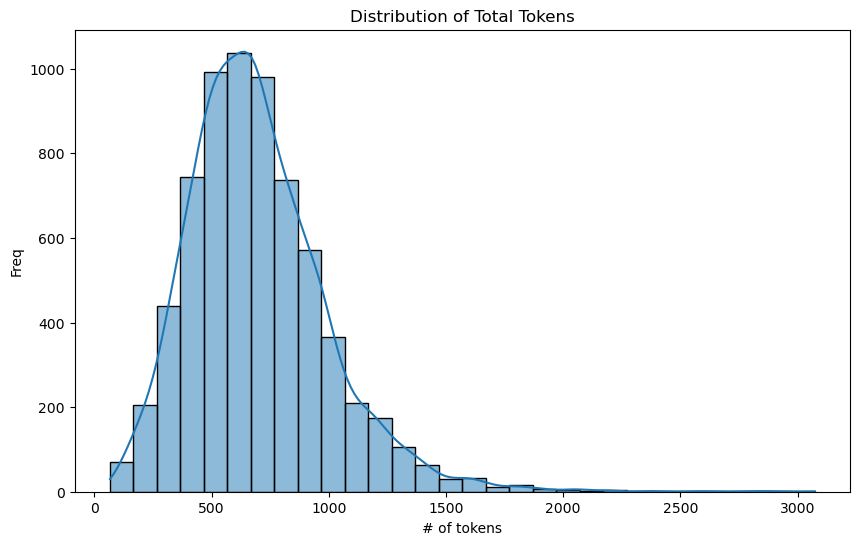

In [17]:
df_dataset['total_tokens'] = df_dataset['tokens'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df_dataset['total_tokens'], bins=30, kde=True)
plt.title('Distribution of Total Tokens')
plt.xlabel('# of tokens')
plt.ylabel('Freq')
plt.show()

# Tokens View

In [10]:
df_dataset.head()

,document,full_text,tokens,trailing_whitespace,labels,input_ids,attention_mask,words,word_labels,word_ids,total_tokens
0,7,Design Thinking for innovation reflexion-Avril...,"[[CLS], ▁Design, ▁Thinking, ▁for, ▁innovation,...","[True, True, True, True, False, False, True, F...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 9, 9, 0, ...","[1, 2169, 12103, 270, 3513, 28310, 4593, 341, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Design, Thinking, for, innovation, reflexion,...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...","[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 4.0, 5.0, 6.0, ...",718
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[[CLS], ▁Diego, ▁Estrada, ▁Design, ▁Thinking, ...","[True, False, False, True, True, False, False,...","[0, 3, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 4941, 60488, 2169, 12103, 28525, 51146, 93...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Diego, Estrada, \n\n, Design, Thinking, Assig...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...","[nan, 0.0, 1.0, 3.0, 4.0, 5.0, 7.0, 8.0, 10.0,...",525
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[[CLS], ▁Reporting, ▁process, ▁by, ▁Gilberto, ...","[True, False, False, True, True, False, False,...","[0, 0, 0, 0, 3, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 16514, 568, 293, 102829, 44365, 22496, 673...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Reporting, process, \n\n, by, Gilberto, Gambo...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O...","[nan, 0.0, 1.0, 3.0, 4.0, 5.0, 5.0, 7.0, 9.0, ...",682
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[[CLS], ▁Design, ▁Thinking, ▁for, ▁Innovation,...","[True, True, True, False, False, True, False, ...","[0, 0, 0, 0, 0, 3, 3, 9, 9, 0, 0, 0, 0, 0, 0, ...","[1, 2169, 12103, 270, 8432, 63632, 608, 3365, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Design, Thinking, for, Innovation, \n\n, Sind...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT...","[nan, 0.0, 1.0, 2.0, 3.0, 5.0, 5.0, 6.0, 6.0, ...",995
4,56,Assignment: Visualization Reflection Submitt...,"[[CLS], ▁Assignment, ▁:, ▁Visualization, ▁Refl...","[False, False, False, False, False, False, Fal...","[0, 0, 0, 0, 0, 0, 0, 0, 3, 9, 0, 0, 0, 0, 0, ...","[1, 28525, 877, 51146, 45730, 22543, 293, 877,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Assignment, :, , Visualization, , Reflecti...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST...","[nan, 0.0, 1.0, 3.0, 5.0, 7.0, 9.0, 10.0, 12.0...",1022


In [11]:
df_dataset

,document,full_text,tokens,trailing_whitespace,labels,input_ids,attention_mask,words,word_labels,word_ids,total_tokens
0,7,Design Thinking for innovation reflexion-Avril...,"[[CLS], ▁Design, ▁Thinking, ▁for, ▁innovation,...","[True, True, True, True, False, False, True, F...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 9, 9, 0, ...","[1, 2169, 12103, 270, 3513, 28310, 4593, 341, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Design, Thinking, for, innovation, reflexion,...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...","[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 4.0, 5.0, 6.0, ...",718
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[[CLS], ▁Diego, ▁Estrada, ▁Design, ▁Thinking, ...","[True, False, False, True, True, False, False,...","[0, 3, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 4941, 60488, 2169, 12103, 28525, 51146, 93...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Diego, Estrada, \n\n, Design, Thinking, Assig...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...","[nan, 0.0, 1.0, 3.0, 4.0, 5.0, 7.0, 8.0, 10.0,...",525
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[[CLS], ▁Reporting, ▁process, ▁by, ▁Gilberto, ...","[True, False, False, True, True, False, False,...","[0, 0, 0, 0, 3, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 16514, 568, 293, 102829, 44365, 22496, 673...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Reporting, process, \n\n, by, Gilberto, Gambo...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O...","[nan, 0.0, 1.0, 3.0, 4.0, 5.0, 5.0, 7.0, 9.0, ...",682
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[[CLS], ▁Design, ▁Thinking, ▁for, ▁Innovation,...","[True, True, True, False, False, True, False, ...","[0, 0, 0, 0, 0, 3, 3, 9, 9, 0, 0, 0, 0, 0, 0, ...","[1, 2169, 12103, 270, 8432, 63632, 608, 3365, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Design, Thinking, for, Innovation, \n\n, Sind...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT...","[nan, 0.0, 1.0, 2.0, 3.0, 5.0, 5.0, 6.0, 6.0, ...",995
4,56,Assignment: Visualization Reflection Submitt...,"[[CLS], ▁Assignment, ▁:, ▁Visualization, ▁Refl...","[False, False, False, False, False, False, Fal...","[0, 0, 0, 0, 0, 0, 0, 0, 3, 9, 0, 0, 0, 0, 0, ...","[1, 28525, 877, 51146, 45730, 22543, 293, 877,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Assignment, :, , Visualization, , Reflecti...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST...","[nan, 0.0, 1.0, 3.0, 5.0, 7.0, 9.0, 10.0, 12.0...",1022
...,...,...,...,...,...,...,...,...,...,...,...
6802,22678,EXAMPLE – JOURNEY MAP\n\nTHE CHALLENGE My w...,"[[CLS], ▁EXAMPLE, ▁–, ▁JOURNEY, ▁MAP, ▁THE, ▁C...","[True, True, True, False, False, True, True, F...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 91531, 377, 110528, 29281, 1598, 71559, 57...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[EXAMPLE, –, JOURNEY, MAP, \n\n, THE, CHALLENG...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[nan, 0.0, 1.0, 2.0, 3.0, 5.0, 6.0, 8.0, 9.0, ...",569
6803,22679,Why Mind Mapping?\n\nMind maps are graphical r...,"[[CLS], ▁Why, ▁Mind, ▁Mapping, ▁?, ▁Mind, ▁map...","[True, True, False, False, False, True, True, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1167, 7826, 28771, 1102, 7826, 5061, 281, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Why, Mind, Mapping, ?, \n\n, Mind, maps, are,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[nan, 0.0, 1.0, 2.0, 3.0, 5.0, 6.0, 7.0, 8.0, ...",411
6804,22681,"Challenge\n\nSo, a few months back, I had chos...","[[CLS], ▁Challenge, ▁So, ▁,, ▁a, ▁few, ▁months...","[False, False, False, True, True, True, True, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 6738, 471, 366, 266, 477, 740, 396, 366, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Challenge, \n\n, So, ,, a, few, months, back,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[nan, 0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",598
6805,22684,Brainstorm

In [12]:
df_dataset[['document','tokens','trailing_whitespace','labels','token_index']]

KeyError: "['token_index'] not in index"

In [ ]:
%%time
df_dataset['token_index'] = df_dataset['tokens'].apply(lambda x: list(range(len(x))))

# Explode the lists in each column, keep track of the original index and list index values
df_tokens = df_dataset[['document','tokens','labels','token_index']].apply(lambda col: col.explode()).reset_index(drop=True)
df_tokens

In [ ]:
ser_value_counts = df_tokens.labels.value_counts()

new_index = ser_value_counts.index.map(id2classes)

# Create a new Series with mapped values
pd.Series(ser_value_counts.values, index=new_index)


In [22]:
df_value_counts = df_tokens.groupby('document')['labels'].value_counts().reset_index(name='Count').sort_values(['labels', 'Count'])
df_value_counts['label_id'] = df_value_counts['labels']
df_value_counts['label'] = df_value_counts['label_id'].map(id2classes)
df_value_counts = df_value_counts.drop('labels', axis = 1)

df_value_counts

,document,Count,label_id,label
4521,13147,67,0,O
7253,19614,69,0,O
7817,20900,76,0,O
3425,11469,81,0,O
2793,10472,83,0,O
...,...,...,...,...
552,4381,9,10,I-PHONE_NUM
1046,6243,24,10,I-PHONE_NUM
2385,9854,11,11,I-STREET_ADDRESS
3403,11442,11,11,I-STREET_ADDRESS


## B-URL_PERSONAL

In [23]:
df_value_counts[df_value_counts.label == 'B-URL_PERSONAL'].sort_values('Count', ascending=False)

,document,Count,label_id,label
4489,13103,120,6,B-URL_PERSONAL
2894,10617,117,6,B-URL_PERSONAL
398,3709,68,6,B-URL_PERSONAL
3878,12154,61,6,B-URL_PERSONAL
2029,9297,58,6,B-URL_PERSONAL
...,...,...,...,...
1187,6784,13,6,B-URL_PERSONAL
4632,13315,13,6,B-URL_PERSONAL
3150,11049,13,6,B-URL_PERSONAL
893,5662,12,6,B-URL_PERSONAL


### Visualize

In [24]:
df_dataset.head()

,document,full_text,tokens,trailing_whitespace,labels,input_ids,attention_mask,words,word_labels,word_ids,total_tokens,token_index
0,7,Design Thinking for innovation reflexion-Avril...,"[[CLS], ▁Design, ▁Thinking, ▁for, ▁innovation,...","[True, True, True, True, False, False, True, F...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 9, 9, 0, ...","[1, 2169, 12103, 270, 3513, 28310, 4593, 341, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Design, Thinking, for, innovation, reflexion,...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...","[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 4.0, 5.0, 6.0, ...",718,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[[CLS], ▁Diego, ▁Estrada, ▁Design, ▁Thinking, ...","[True, False, False, True, True, False, False,...","[0, 3, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 4941, 60488, 2169, 12103, 28525, 51146, 93...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Diego, Estrada, \n\n, Design, Thinking, Assig...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...","[nan, 0.0, 1.0, 3.0, 4.0, 5.0, 7.0, 8.0, 10.0,...",525,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[[CLS], ▁Reporting, ▁process, ▁by, ▁Gilberto, ...","[True, False, False, True, True, False, False,...","[0, 0, 0, 0, 3, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 16514, 568, 293, 102829, 44365, 22496, 673...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Reporting, process, \n\n, by, Gilberto, Gambo...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O...","[nan, 0.0, 1.0, 3.0, 4.0, 5.0, 5.0, 7.0, 9.0, ...",682,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[[CLS], ▁Design, ▁Thinking, ▁for, ▁Innovation,...","[True, True, True, False, False, True, False, ...","[0, 0, 0, 0, 0, 3, 3, 9, 9, 0, 0, 0, 0, 0, 0, ...","[1, 2169, 12103, 270, 8432, 63632, 608, 3365, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Design, Thinking, for, Innovation, \n\n, Sind...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT...","[nan, 0.0, 1.0, 2.0, 3.0, 5.0, 5.0, 6.0, 6.0, ...",995,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,56,Assignment: Visualization Reflection Submitt...,"[[CLS], ▁Assignment, ▁:, ▁Visualization, ▁Refl...","[False, False, False, False, False, False, Fal...","[0, 0, 0, 0, 0, 0, 0, 0, 3, 9, 0, 0, 0, 0, 0, ...","[1, 28525, 877, 51146, 45730, 22543, 293, 877,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Assignment, :, , Visualization, , Reflecti...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST...","[nan, 0.0, 1.0, 3.0, 5.0, 7.0, 9.0, 10.0, 12.0...",1022,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [25]:
np_id2classes = np.array(classes)

In [26]:
cur_sample = df_dataset.loc[3709]

cur_tokens = cur_sample['tokens']
cur_token_labels = np_id2classes[cur_sample.labels]

nlp = spacy.load("en_core_web_sm")
doc = Doc(nlp.vocab, words=cur_tokens)

In [27]:
visualize_label(nlp, doc, cur_tokens, cur_token_labels, options = options_pii)

D:\Anaconda3\envs\nlp_torch\Lib\site-packages\spacy\displacy\__init__.py:244: UserWarning: [W117] No spans to visualize found in Doc object with spans_key: 'sc'. If this is surprising to you, make sure the Doc was processed using a model that supports span categorization, and check the `doc.spans[spans_key]` property manually if necessary.

Available keys: ['sc']
  warnings.warn(Warnings.W117.format(spans_key=spans_key, keys=keys))


In [28]:

cur_words = cur_sample['words']
cur_word_labels = cur_sample['word_labels']


visualize_label(nlp, doc, cur_words, cur_word_labels, options = options_pii)

## B-EMAIL

In [29]:
df_value_counts[df_value_counts.label == 'B-EMAIL'].sort_values('Count', ascending=False)

,document,Count,label_id,label
1324,7308,28,1,B-EMAIL
1047,6243,21,1,B-EMAIL
3745,11954,18,1,B-EMAIL
399,3709,17,1,B-EMAIL
3308,11301,16,1,B-EMAIL
1928,9146,14,1,B-EMAIL
572,4438,14,1,B-EMAIL
511,4227,12,1,B-EMAIL
3088,10945,12,1,B-EMAIL
1220,6900,12,1,B-EMAIL


In [42]:
target_doc_id = 7308
df_query = df_dataset[df_dataset.document == target_doc_id]
df_query

,document,full_text,tokens,trailing_whitespace,labels,input_ids,attention_mask,words,word_labels,word_ids,total_tokens,token_index
440,7308,Md Carrillo\n\nlisarose@gmail.com\n\ndiazkrist...,"[[CLS], ▁Md, ▁Carrillo, ▁lisa, rose, @, gmail,...","[True, False, False, False, False, False, Fals...","[0, 3, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 25884, 87905, 97971, 21220, 1683, 13007, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Md, Carrillo, \n\n, lisarose@gmail.com, \n\n,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, B-EMAIL, O...","[nan, 0.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...",743,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


# Initialize

In [44]:
df_dataset.loc[0].full_text

"Design Thinking for innovation reflexion-Avril 2021-Nathalie Sylla\n\nChallenge & selection\n\nThe tool I use to help all stakeholders finding their way through the complexity of a project is the  mind map.\n\nWhat exactly is a mind map? According to the definition of Buzan T. and Buzan B. (1999, Dessine-moi  l'intelligence. Paris: Les Éditions d'Organisation.), the mind map (or heuristic diagram) is a graphic  representation technique that follows the natural functioning of the mind and allows the brain's  potential to be released. Cf Annex1\n\nThis tool has many advantages:\n\n•  It is accessible to all and does not require significant material investment and can be done  quickly\n\n•  It is scalable\n\n•  It allows categorization and linking of information\n\n•  It can be applied to any type of situation: notetaking, problem solving, analysis, creation of  new ideas\n\n•  It is suitable for all people and is easy to learn\n\n•  It is fun and encourages exchanges\n\n•  It makes visi

In [21]:
tokenizer = AutoTokenizer.from_pretrained("Yanis/microsoft-deberta-v3-large_ner_conll2003-anonimization_TRY_1")

# Inspect difference of tokenization from words vs full_text

## Full string

In [26]:
%%time
df_dataset['tokens_from_text'] = df_dataset.apply(lambda row: tokenizer.tokenize(row.full_text), axis=1)

CPU times: total: 18.4 s
Wall time: 18.6 s


## Words

In [27]:
%%time
df_dataset['tokens_from_words'] = df_dataset.apply(lambda row: tokenizer.tokenize(row.words, is_split_into_words = True), axis=1)

CPU times: total: 39.8 s
Wall time: 40.2 s


## Comparison

In [28]:
comparison = df_dataset['tokens_from_words'] == df_dataset['tokens_from_text']

In [34]:
df_dataset.loc[0:10,['tokens_from_words','tokens_from_text']]

,tokens_from_words,tokens_from_text
0,"[▁Design, ▁Thinking, ▁for, ▁innovation, ▁refle...","[▁Design, ▁Thinking, ▁for, ▁innovation, ▁refle..."
1,"[▁Diego, ▁Estrada, ▁Design, ▁Thinking, ▁Assign...","[▁Diego, ▁Estrada, ▁Design, ▁Thinking, ▁Assign..."
2,"[▁Reporting, ▁process, ▁by, ▁Gilberto, ▁Gamb, ...","[▁Reporting, ▁process, ▁by, ▁Gilberto, ▁Gamb, ..."
3,"[▁Design, ▁Thinking, ▁for, ▁Innovation, ▁Sind,...","[▁Design, ▁Thinking, ▁for, ▁Innovation, ▁Sind,..."
4,"[▁Assignment, ▁:, ▁Visualization, ▁Reflection,...","[▁Assignment, :, ▁Visualization, ▁Reflection, ..."
5,"[▁Cheese, ▁Startup, ▁-, ▁Learning, ▁Launch, ▁b...","[▁Cheese, ▁Startup, ▁-, ▁Learning, ▁Launch, ▁b..."
6,"[▁Silvia, ▁Villa, lobo, s, ▁Challenge, ▁:, ▁Th...","[▁Silvia, ▁Villa, lobo, s, ▁Challenge, :, ▁The..."
7,"[▁Storytelling, ▁The, ▁Path, ▁to, ▁Innovation,...","[▁Storytelling, ▁The, ▁Path, ▁to, ▁Innovation,..."
8,"[▁Reflection, ▁–, ▁Learning, ▁Launch, ▁Francis...","[▁Reflection, ▁–, ▁Learning, ▁Launch, ▁Francis..."
9,"[▁Gandhi, ▁Institute, ▁of, ▁Technology, ▁and, ...","[▁Gandhi, ▁Institute, ▁of, ▁Technology, ▁and, ..."


Insight:
 - Need to pretokenize first with spacy before applying subword tokenization
 - Same with external datasets
   - OpenPII
     - Cur pipeline: subword tokenization (get offsets) -> map subwords to labeled char spans
     - pretokenize with spacy
       - messes up alignment of original labeled char spans
       - dsadas

In [41]:
print(len(df_dataset.loc[0].tokens_from_words), len(df_dataset.loc[0].tokens_from_text))

716 724


In [40]:
for token_1, token_2 in zip(df_dataset.loc[0].tokens_from_words, df_dataset.loc[0].tokens_from_text):
    if token_1 != token_2:
        print(token_1, token_2)

▁- -
▁Avril Av
▁2021 ril
▁- ▁2021
▁Nathalie -
▁S N
ylla atha
▁Challenge lie
▁& ▁S
▁selection ylla
▁The ▁Challenge
▁tool ▁&
▁I ▁selection
▁use ▁The
▁to ▁tool
▁help ▁I
▁all ▁use
▁stakeholders ▁to
▁finding ▁help
▁their ▁all
▁way ▁stakeholders
▁through ▁finding
▁the ▁their
▁complexity ▁way
▁of ▁through
▁a ▁the
▁project ▁complexity
▁is ▁of
▁the ▁a
▁mind ▁project
▁map ▁is
▁. ▁the
▁What ▁mind
▁exactly ▁map
▁is .
▁a ▁What
▁mind ▁exactly
▁map ▁is
▁? ▁a
▁According ▁mind
▁to ▁map
▁the ?
▁definition ▁According
▁of ▁to
▁Buz ▁the
an ▁definition
▁T ▁of
. ▁Buz
▁and an
▁Buz ▁T
an .
▁B ▁and
. ▁Buz
▁( an
▁1999 ▁B
▁, .
▁Des ▁(
s 1999
ine ,
▁- ▁Des
▁moi s
▁l ine
' -
intelligence moi
▁. ▁l
▁Paris '
▁: intelligence
▁Les .
▁É ▁Paris
dition :
s ▁Les
▁d ▁É
' dition
Organ s
isation ▁d
▁. '
▁) Organ
▁, isation
▁the .
▁mind )
▁map ,
▁( ▁the
▁or ▁mind
▁heuristic ▁map
▁diagram ▁(
▁) or
▁is ▁heuristic
▁a ▁diagram
▁graphic )
▁representation ▁is
▁technique ▁a
▁that ▁graphic
▁follows ▁representation
▁the ▁technique
▁nat

In [30]:
comparison[comparison]

5992    True
dtype: bool

# Preprocessing

### Visualize

In [43]:
cur_sample = df_dataset.loc[440]

cur_tokens = cur_sample['tokens']
cur_token_labels = np_id2classes[cur_sample.labels]

nlp = spacy.load("en_core_web_sm")
doc = Doc(nlp.vocab, words=cur_tokens)

In [46]:
visualize_label(nlp, doc, cur_tokens, cur_token_labels, options = options_pii)

In [47]:

cur_words = cur_sample['words']
cur_word_labels = cur_sample['word_labels']


visualize_label(nlp, doc, cur_words, cur_word_labels, options = options_pii)

# Filter

In [18]:
def count_row_labels(row, label, label_col = 'deberta_labels'):
    
    counts = Counter(row[label_col])[label]
    return counts

In [19]:
df_dataset.head()

,document,full_text,tokens,trailing_whitespace,labels,input_ids,attention_mask,words,word_labels,word_ids,total_tokens
0,7,Design Thinking for innovation reflexion-Avril...,"[[CLS], ▁Design, ▁Thinking, ▁for, ▁innovation,...","[True, True, True, True, False, False, True, F...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 9, 9, 0, ...","[1, 2169, 12103, 270, 3513, 28310, 4593, 341, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Design, Thinking, for, innovation, reflexion,...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...","[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 4.0, 5.0, 6.0, ...",718
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[[CLS], ▁Diego, ▁Estrada, ▁Design, ▁Thinking, ...","[True, False, False, True, True, False, False,...","[0, 3, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 4941, 60488, 2169, 12103, 28525, 51146, 93...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Diego, Estrada, \n\n, Design, Thinking, Assig...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...","[nan, 0.0, 1.0, 3.0, 4.0, 5.0, 7.0, 8.0, 10.0,...",525
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[[CLS], ▁Reporting, ▁process, ▁by, ▁Gilberto, ...","[True, False, False, True, True, False, False,...","[0, 0, 0, 0, 3, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 16514, 568, 293, 102829, 44365, 22496, 673...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Reporting, process, \n\n, by, Gilberto, Gambo...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O...","[nan, 0.0, 1.0, 3.0, 4.0, 5.0, 5.0, 7.0, 9.0, ...",682
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[[CLS], ▁Design, ▁Thinking, ▁for, ▁Innovation,...","[True, True, True, False, False, True, False, ...","[0, 0, 0, 0, 0, 3, 3, 9, 9, 0, 0, 0, 0, 0, 0, ...","[1, 2169, 12103, 270, 8432, 63632, 608, 3365, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Design, Thinking, for, Innovation, \n\n, Sind...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT...","[nan, 0.0, 1.0, 2.0, 3.0, 5.0, 5.0, 6.0, 6.0, ...",995
4,56,Assignment: Visualization Reflection Submitt...,"[[CLS], ▁Assignment, ▁:, ▁Visualization, ▁Refl...","[False, False, False, False, False, False, Fal...","[0, 0, 0, 0, 0, 0, 0, 0, 3, 9, 0, 0, 0, 0, 0, ...","[1, 28525, 877, 51146, 45730, 22543, 293, 877,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Assignment, :, , Visualization, , Reflecti...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST...","[nan, 0.0, 1.0, 3.0, 5.0, 7.0, 9.0, 10.0, 12.0...",1022


In [ ]:
df_dataset['deberta_tokens_len'] = df_dataset['deberta_tokens'].apply(len)
df_dataset['count_O'] = df_dataset.apply(lambda row: count_row_labels(row, 'O', label_col='deberta_labels_bio'), axis=1)
df_dataset['density_O'] = df_dataset.apply(lambda row: row.count_O / row.deberta_tokens_len, axis=1)

## B-PHONE_NUMBER

In [ ]:
label_name = 'B-PHONE_NUMBER'




In [69]:
df_dataset_en['deberta_tokens_len'] = df_dataset_en['deberta_tokens'].apply(len)
df_dataset_en['count_O'] = df_dataset_en.apply(lambda row: count_row_labels(row, 'O', label_col='deberta_labels_bio'), axis=1)
df_dataset_en['density_O'] = df_dataset_en.apply(lambda row: row.count_O / row.deberta_tokens_len, axis=1)

C:\Users\cloud\AppData\Local\Temp\ipykernel_15368\779489231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dataset_en['deberta_tokens_len'] = df_dataset_en['deberta_tokens'].apply(len)
C:\Users\cloud\AppData\Local\Temp\ipykernel_15368\779489231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dataset_en['count_O'] = df_dataset_en.apply(lambda row: count_row_labels(row, 'O', label_col='deberta_labels_bio'), axis=1)
C:\Users\cloud\AppData\Local\Temp\ipykernel_15368\779489231.py:3: SettingWithCop

In [29]:
df_value_counts[df_value_counts.label == 'label_name'].sort_values('Count', ascending=False)

,document,Count,label_id,label
1324,7308,28,1,B-EMAIL
1047,6243,21,1,B-EMAIL
3745,11954,18,1,B-EMAIL
399,3709,17,1,B-EMAIL
3308,11301,16,1,B-EMAIL
1928,9146,14,1,B-EMAIL
572,4438,14,1,B-EMAIL
511,4227,12,1,B-EMAIL
3088,10945,12,1,B-EMAIL
1220,6900,12,1,B-EMAIL


In [42]:
target_doc_id = 7308
df_query = df_dataset[df_dataset.document == target_doc_id]
df_query

,document,full_text,tokens,trailing_whitespace,labels,input_ids,attention_mask,words,word_labels,word_ids,total_tokens,token_index
440,7308,Md Carrillo\n\nlisarose@gmail.com\n\ndiazkrist...,"[[CLS], ▁Md, ▁Carrillo, ▁lisa, rose, @, gmail,...","[True, False, False, False, False, False, Fals...","[0, 3, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 25884, 87905, 97971, 21220, 1683, 13007, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Md, Carrillo, \n\n, lisarose@gmail.com, \n\n,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, B-EMAIL, O...","[nan, 0.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...",743,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


### Visualize

In [43]:
cur_sample = df_dataset.loc[440]

cur_tokens = cur_sample['tokens']
cur_token_labels = np_id2classes[cur_sample.labels]

nlp = spacy.load("en_core_web_sm")
doc = Doc(nlp.vocab, words=cur_tokens)

In [46]:
visualize_label(nlp, doc, cur_tokens, cur_token_labels, options = options_pii)

In [47]:

cur_words = cur_sample['words']
cur_word_labels = cur_sample['word_labels']


visualize_label(nlp, doc, cur_words, cur_word_labels, options = options_pii)

# Experiments

In [67]:
def pretokenize_with_alignment(full_text, labeled_spans):
    # Load Spacy's English tokenizer
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(full_text)

    # Tokenize the text
    tokens = [token.text for token in doc]

    # Initialize aligned labels
    aligned_labels = []

    # Initialize variables for tracking character positions
    current_char_position = 0
    current_token_index = 0

    # Iterate through labeled spans and align with tokens
    for label, start, end in labeled_spans:
        # Find the token index corresponding to the start character position
        while current_char_position < start:
            current_char_position += len(tokens[current_token_index])
            current_token_index += 1

        # Assign label to the token
        aligned_labels.append((label, current_token_index))

        # Move to the next token index until the end character position is reached
        while current_char_position < end:
            current_char_position += len(tokens[current_token_index])
            current_token_index += 1

    return tokens, aligned_labels

# Example usage
# full_text = "This is a sample text for demonstration."
full_text = "This is a zamble dext for demonstration."
labeled_spans = [("ENTITY", 10, 16), ("ATTRIBUTE", 17, 21)]  # Example labeled spans

pretokenized_text, aligned_labels = pretokenize_with_alignment(full_text, labeled_spans)

list_mapped = [(full_text[start:end], label) for label, start, end in labeled_spans]
list_aligned = [(pretokenized_text[i_token], label) for label, i_token in aligned_labels]

print("Original Text:", full_text)
print("Original Spans:", labeled_spans)
print("list_mapped:", list_mapped)

print("Pretokenized Text:", pretokenized_text)
print("Aligned Labels:", aligned_labels)
print("list_aligned:", list_aligned)

Original Text: This is a zamble dext for demonstration.
Original Spans: [('ENTITY', 10, 16), ('ATTRIBUTE', 17, 21)]
list_mapped: [('zamble', 'ENTITY'), ('dext', 'ATTRIBUTE')]
Pretokenized Text: ['This', 'is', 'a', 'zamble', 'dext', 'for', 'demonstration', '.']
Aligned Labels: [('ENTITY', 4), ('ATTRIBUTE', 5)]


In [75]:
print("Pretokenized Text:", pretokenized_text)
print("Aligned Labels:", aligned_labels)
print("list_aligned:", list_aligned)

Pretokenized Text: ['This', 'is', 'a', 'zamble', 'dext', 'for', 'demonstration', '.']
Aligned Labels: [('ENTITY', 4), ('ATTRIBUTE', 5)]
list_aligned: [('dext', 'ENTITY'), ('for', 'ATTRIBUTE')]


In [56]:
from transformers import BertTokenizer

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json: 100%|████████████████████████████████████████████████████████████████| 48.0/48.0 [00:00<?, ?B/s]
D:\Anaconda3\envs\nlp_torch\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\cloud\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [69]:
# Further tokenize the tokens into subwords using BERT tokenizer
subword_tokens = []
subword_aligned_labels = []

tokens = pretokenized_text

# Track the current subword index
current_subword_index = 0

for token in tokens:
    # Tokenize the token into subwords
    sub_tokens = bert_tokenizer.tokenize(token)

    # Assign label to each subword
    for sub_token in sub_tokens:
        subword_tokens.append(sub_token)

        # Check if there are aligned labels for the current token
        if current_subword_index < len(aligned_labels):
            label, token_index = aligned_labels[current_subword_index]
            subword_aligned_labels.append((label, len(subword_tokens) - 1))  # Assign label to the last added subword

    # Increment the current subword index
    current_subword_index += 1

In [70]:
bert_tokenizer.tokenize('dext')

['dex', '##t']

In [71]:
subword_tokens

['this', 'is', 'a', 'za', '##mble', 'dex', '##t', 'for', 'demonstration', '.']

In [73]:
subword_aligned_labels

[('ENTITY', 0), ('ATTRIBUTE', 1)]